## Homework 6
October 31, 2022<br>
Vivian Lin<br>
ID: 6043749830<br>
Dr. Mohammad Rajati<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from heapq import nlargest
from math import sqrt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<b>1. Tree-Based Method<br>
1a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.</b>

In [2]:
train = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=20)
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
test = pd.read_csv("../data/aps_failure_test_set.csv", skiprows=20)
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


<b>1b) Data Preparation -- This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.<br>
1bi) Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.</b>

Data imputation methods:<br>
1. Replace with mean, median or mode of the feature/column.<br>
2. Replace with value estimated by another predictive model (Expectation Maximization).<br><br>
Since we have a large dataset, a simple data imputation approach is better, so choosing to replace data with mean and median (trying both methods). First, combine the training and testing data, but with a column attached to the dataframe to identify train/test data. Secondly, replace with mean and median.<br>


In [4]:
# Combine the training and test datasets with added column at the end to identify train/test.
train['type'] = "train"
test['type'] = "test"
df = pd.concat([train, test])
df.reset_index(drop=True, inplace=True)
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,type
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,493384,721044,469792,339156,157956,73224,0,0,0,train
1,neg,33058,na,0,na,0,0,0,0,0,...,178064,293306,245416,133654,81140,97576,1500,0,0,train
2,neg,41040,na,228,100,0,0,0,0,0,...,159812,423992,409564,320746,158022,95128,514,0,0,train
3,neg,12,0,70,66,0,10,0,0,0,...,46,58,44,10,0,0,0,4,32,train
4,neg,60874,na,1368,458,0,0,0,0,0,...,229790,405298,347188,286954,311560,433954,1218,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,na,2130706432,892,0,0,0,0,0,...,273242,510354,373918,349840,317840,960024,25566,0,0,test
75996,neg,18,0,52,46,8,26,0,0,0,...,44,46,14,2,0,0,0,0,0,test
75997,neg,79636,na,1670,1518,0,0,0,0,0,...,449962,778826,581558,375498,222866,358934,19548,0,0,test
75998,neg,110,na,36,32,0,0,0,0,0,...,210,180,544,1004,1338,74,0,0,0,test


In [5]:
# Convert all "na" missing values to the NaN standard for data imputation
df.replace('na', np.NaN, inplace=True)
# Show number of NaN values in each column
df.isna().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
type          0
Length: 172, dtype: int64

In [6]:
# Since class and type don't have Null values and are categorical, can drop them for the time being.
df_impute = df.drop(['class', 'type'], axis=1)
# Convert everything to float since np.Nan is considered a float.
df_impute = df_impute.astype(float)
df_impute

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [7]:
# Replace missing values with mean.
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df_impute)
df_mean = pd.DataFrame(imp_mean, columns=df_impute.columns)
df_mean

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [8]:
# Replace missing values with median.
imp_med = SimpleImputer(missing_values=np.NaN, strategy='median').fit_transform(df_impute)
df_med = pd.DataFrame(imp_med, columns=df_impute.columns)
df_med

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,128.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


<b>1bii) For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.</b>

In [9]:
# Calculate CV for dataframe replaced with mean.
mean_cv_dict = {}
mean_c_stats = df_mean.describe()
for cols in df_mean.columns:
    # CV = standard deviation / sample mean
    mean_cv_dict[cols] = mean_c_stats[cols][2] / mean_c_stats[cols][1]

mean_cv = pd.DataFrame(mean_cv_dict, index=["CV_mean"])
mean_cv

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
CV_mean,4.328608,2.178273,2.167653,206.7215,22.29367,18.209016,91.460654,42.084343,17.625909,8.7533,...,2.603613,2.573291,2.625407,2.858261,3.23101,4.885098,3.335037,5.753933,47.919544,45.65095


In [10]:
# Calculate CV for dataframe replace with median.
med_cv_dict = {}
med_c_stats = df_med.describe()
for cols in df_med.columns:
    # CV = standard deviation / sample mean
    med_cv_dict[cols] = med_c_stats[cols][2] / med_c_stats[cols][1]

med_cv = pd.DataFrame(med_cv_dict, index=["CV_med"])
med_cv

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
CV_med,4.328608,9.740521,2.309299,274.790378,23.271357,19.007953,92.50751,42.566145,17.827963,8.85413,...,2.618263,2.587635,2.641102,2.875887,3.258677,4.93538,3.373881,5.821008,50.223681,47.845392


In [11]:
# Display CV of two data imputation together.
cv_both = pd.concat([mean_cv, med_cv])
cv_both

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
CV_mean,4.328608,2.178273,2.167653,206.721500,22.293670,18.209016,91.460654,42.084343,17.625909,8.75330,...,2.603613,2.573291,2.625407,2.858261,3.231010,4.885098,3.335037,5.753933,47.919544,45.650950
CV_med,4.328608,9.740521,2.309299,274.790378,23.271357,19.007953,92.507510,42.566145,17.827963,8.85413,...,2.618263,2.587635,2.641102,2.875887,3.258677,4.935380,3.373881,5.821008,50.223681,47.845392


<b>1biii) Plot a correlation matrix for your features using pandas or any other tool.</b>

In [12]:
df_mean.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,0.307443,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,0.035696,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,-0.022889,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,-0.000223,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
ae_000,0.025795,0.024869,-0.004769,-0.000195,1.000000,0.829986,-0.000441,-0.000609,0.001948,0.020678,...,0.012751,0.019441,0.012847,0.026437,0.066533,0.036619,-0.008393,-0.006952,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,0.020684,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,0.011036,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


In [13]:
df_med.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.009953,-0.037851,-0.000801,0.023778,0.033524,0.011686,0.076387,0.195179,0.307466,...,0.414098,0.419884,0.409628,0.419753,0.425622,0.356954,0.259626,0.133790,0.005648,0.009239
ab_000,0.009953,1.000000,-0.002489,-0.000372,0.034129,0.053156,-0.000206,0.006841,0.024010,0.037640,...,-0.000332,0.010885,0.001855,0.012073,0.016158,0.010747,-0.026319,-0.017057,0.051733,0.077262
ac_000,-0.037851,-0.002489,1.000000,-0.001568,-0.004005,-0.009773,0.015077,-0.007137,-0.022578,-0.046973,...,-0.047540,-0.041136,-0.040610,-0.041436,-0.047661,-0.048884,-0.004806,0.012019,-0.006200,0.016273
ad_000,-0.000801,-0.000372,-0.001568,1.000000,-0.000156,-0.000190,-0.000038,-0.000085,-0.000202,-0.000407,...,-0.001343,-0.001350,-0.001318,-0.001092,-0.001054,-0.000722,-0.001060,-0.000622,-0.000072,-0.000076
ae_000,0.023778,0.034129,-0.004005,-0.000156,1.000000,0.830001,-0.000465,-0.000953,0.000977,0.018881,...,0.009860,0.016805,0.010357,0.023873,0.063898,0.034168,-0.009518,-0.007330,0.063622,0.030893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356954,0.010747,-0.048884,-0.000722,0.034168,0.043477,0.007652,0.067999,0.181955,0.475604,...,0.442405,0.433122,0.419859,0.380362,0.543650,1.000000,0.227539,0.063395,-0.001551,-0.000363
ee_008,0.259626,-0.026319,-0.004806,-0.001060,-0.009518,-0.012225,0.000102,0.005364,0.009142,0.020924,...,0.442837,0.470860,0.448713,0.394357,0.366141,0.227539,1.000000,0.690270,-0.005663,-0.002474
ee_009,0.133790,-0.017057,0.012019,-0.000622,-0.007330,-0.009004,-0.001082,-0.003530,-0.009065,-0.018009,...,0.224864,0.236117,0.221077,0.184135,0.158955,0.063395,0.690270,1.000000,-0.003312,-0.001216
ef_000,0.005648,0.051733,-0.006200,-0.000072,0.063622,0.093517,-0.000086,0.000960,0.005119,0.010094,...,0.002271,0.008862,0.001752,0.025645,0.003997,-0.001551,-0.005663,-0.003312,1.000000,0.222595


<b>1biv) Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.</b>

Part 1: For data imputed with mean.

In [14]:
# Pick the features with highest CV.
feat_nums = round(sqrt(df_mean.shape[1]))
highest_CV_cols = nlargest(feat_nums, mean_cv_dict, key=mean_cv_dict.get)
mean_highest_CV = df_mean[highest_CV_cols]
mean_highest_CV

,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


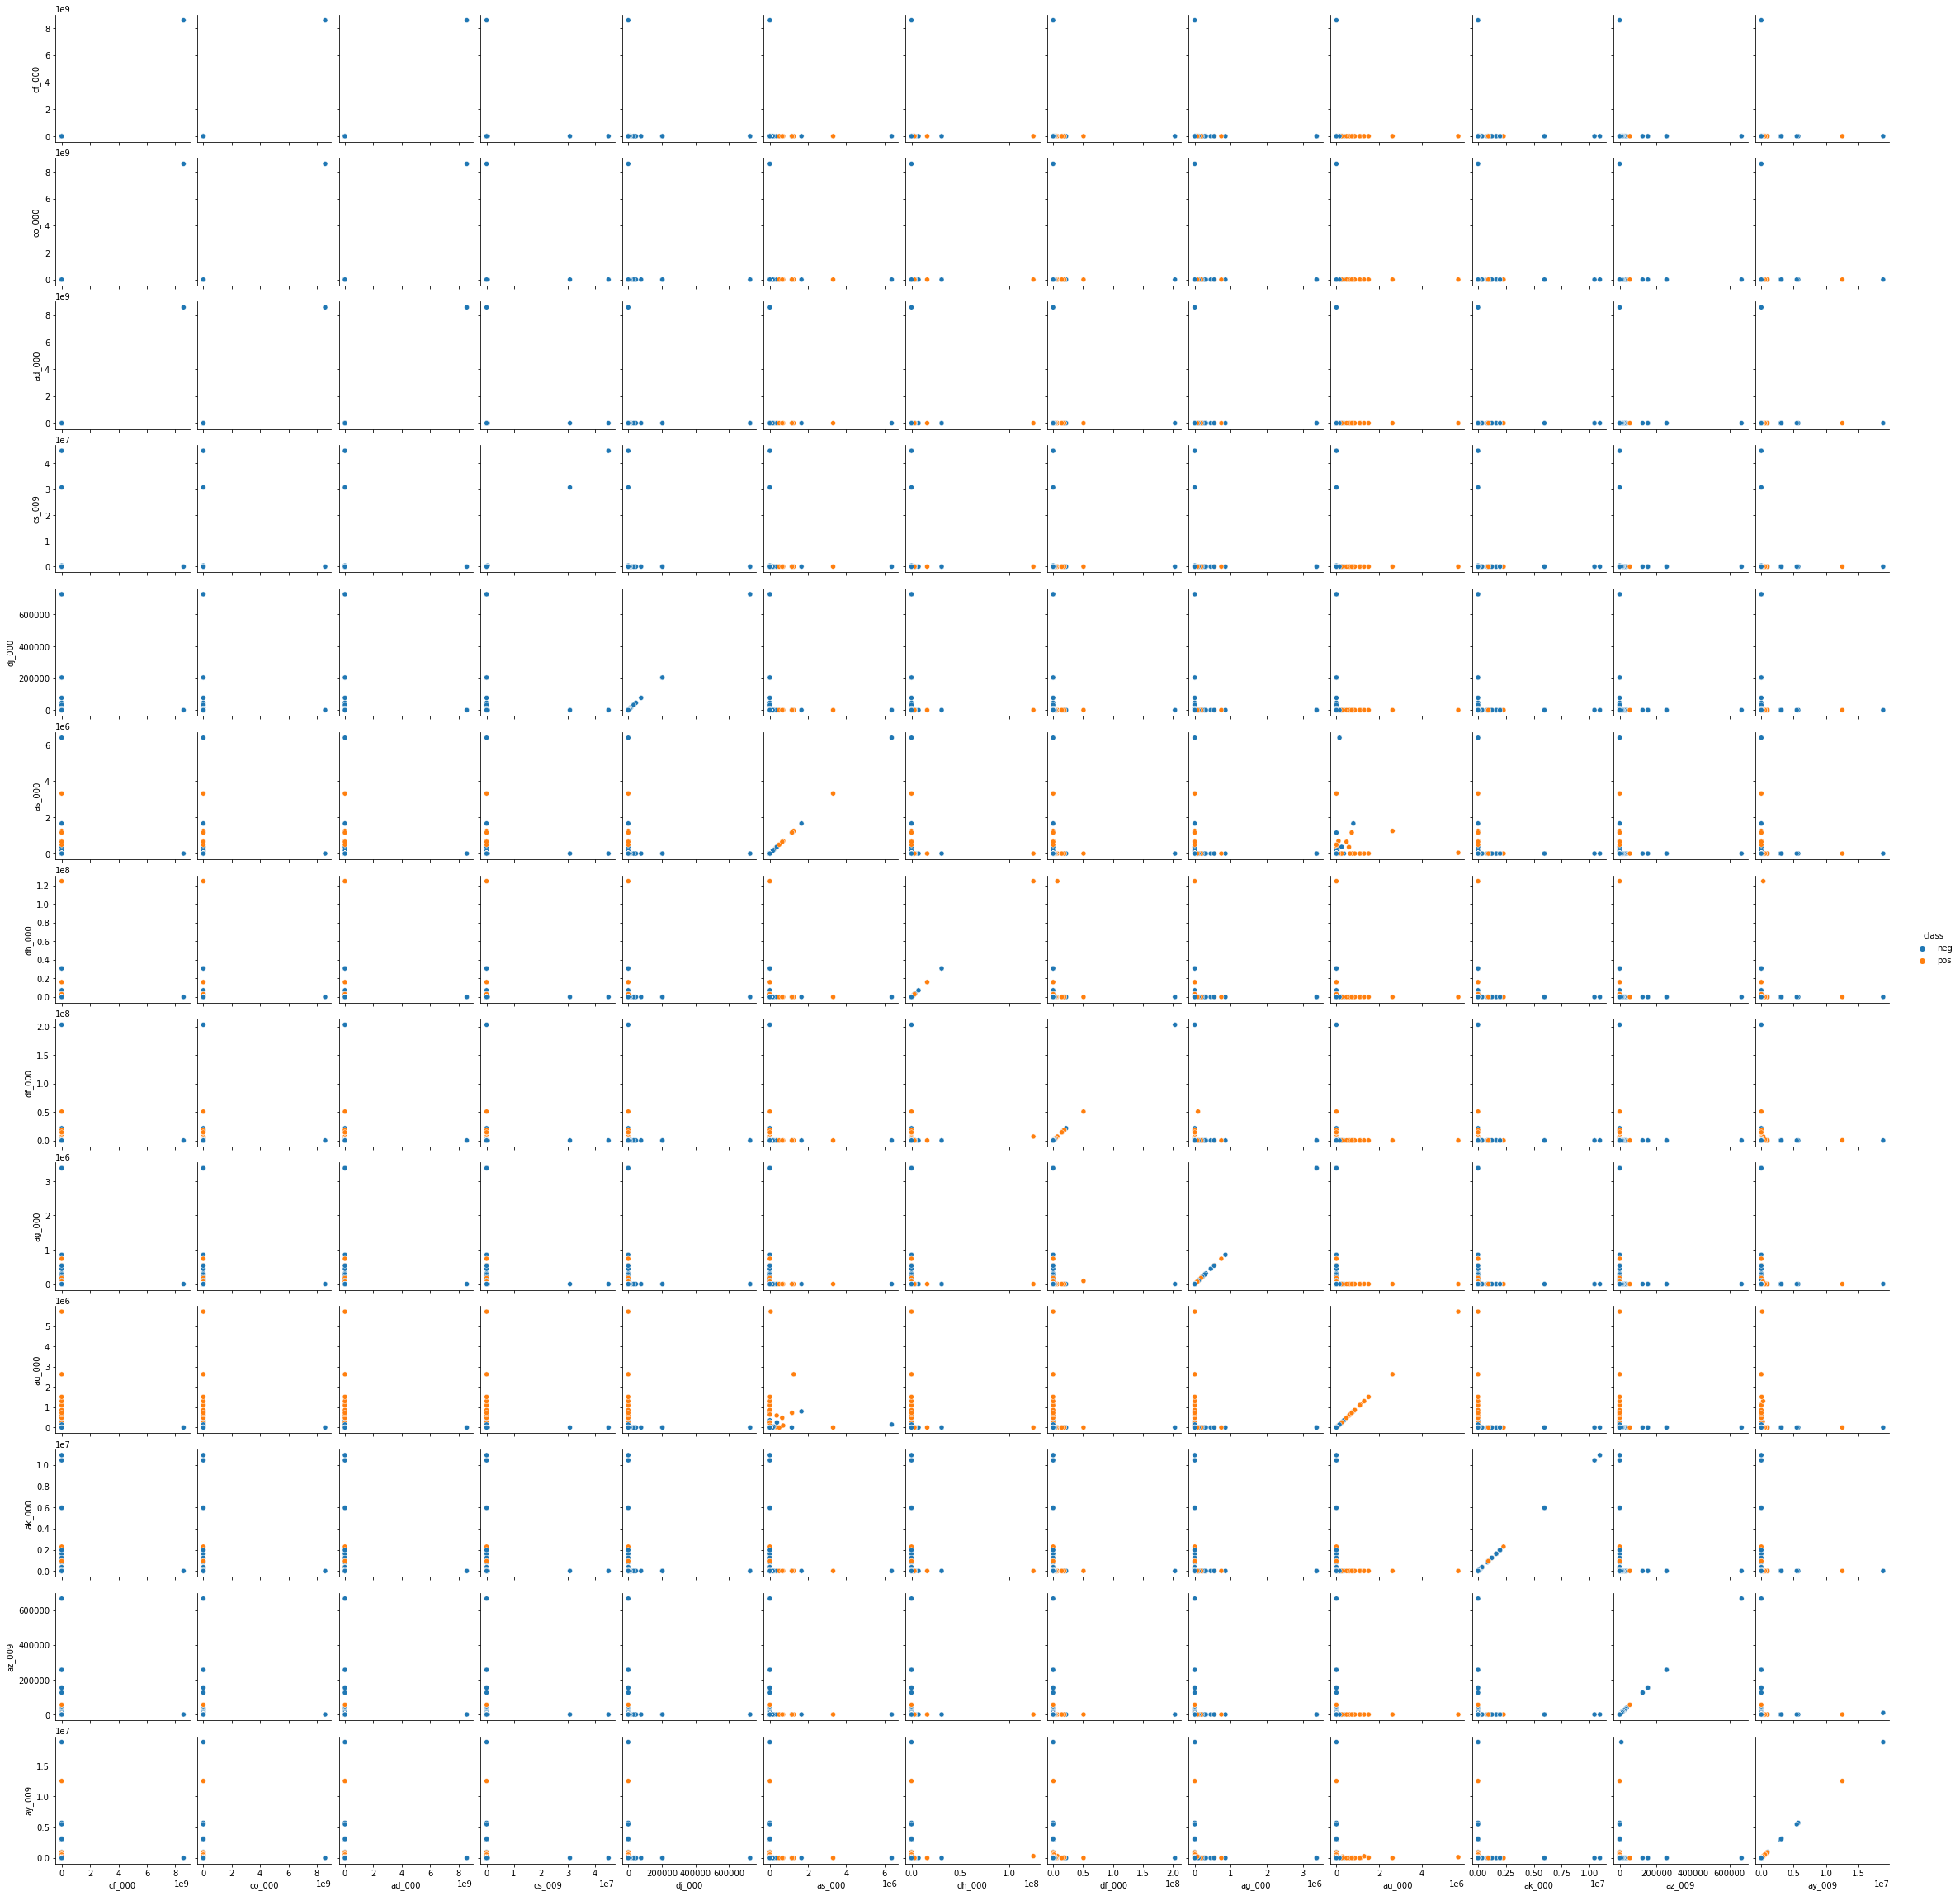

In [15]:
# Add the class data into the dataframe such the pairplot can have hue to differentiate positive and negative.
class_mean_CV = pd.concat([mean_highest_CV, df['class']], axis=1)

# Make scatterplot for these features, removed the diagonal (as suggested on Piazza) to help with run time.
sns.pairplot(data=class_mean_CV, diag_kind=None, hue='class')
plt.show()

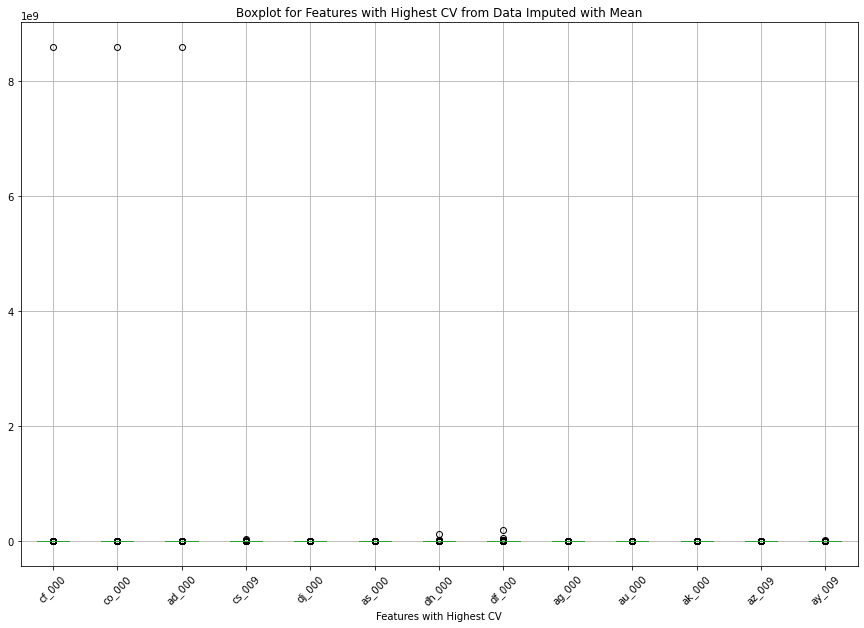

In [16]:
# Make boxplot for these features.
mean_highest_CV.boxplot(rot=45, figsize=(15, 10))
plt.xlabel("Features with Highest CV")
plt.title("Boxplot for Features with Highest CV from Data Imputed with Mean")
plt.show()

Part 2: For data imputed with median.

In [17]:
feat_nums = round(sqrt(df_med.shape[1]))
highest_CV_cols = nlargest(feat_nums, med_cv_dict, key=med_cv_dict.get)
med_highest_CV = df_med[highest_CV_cols]
med_highest_CV

,cf_000,co_000,ad_000,cs_009,dj_000,dh_000,df_000,as_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,202.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.0,42.0,892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,2.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,2.0,378.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


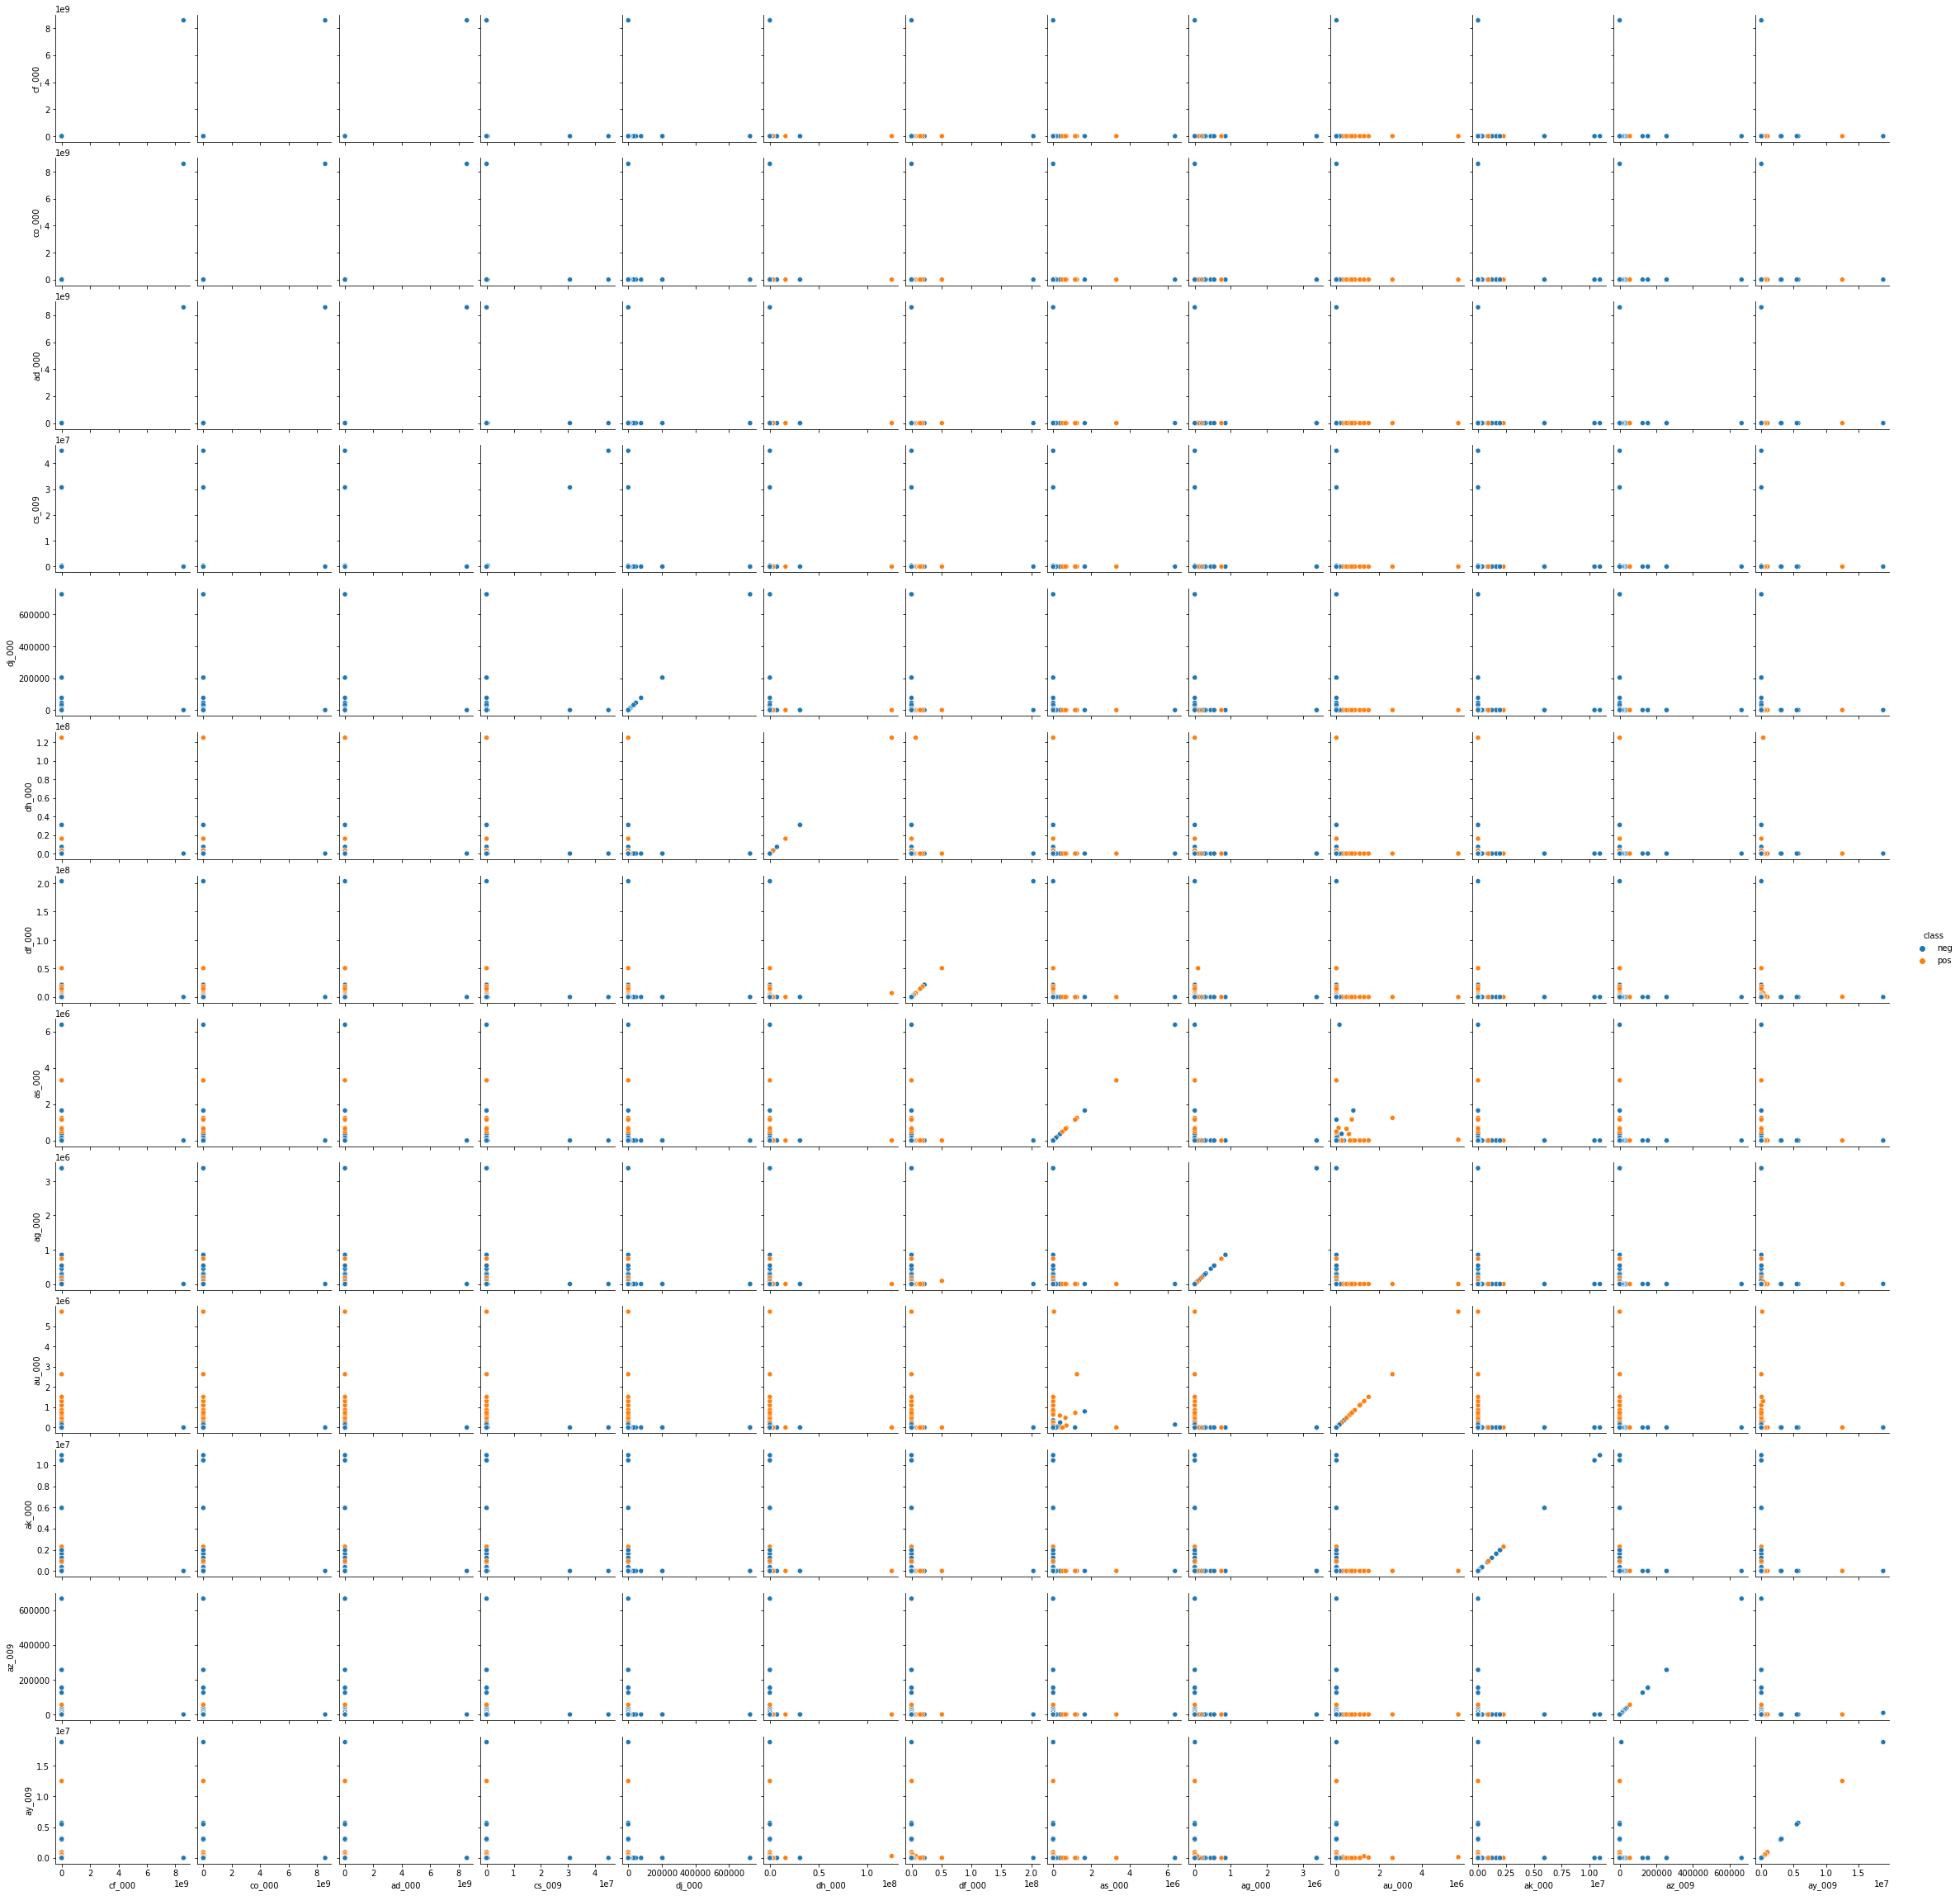

In [18]:
# Add the class data into the dataframe such the pairplot can have hue to differentiate positive and negative.
class_med_CV = pd.concat([med_highest_CV, df['class']], axis=1)

# Make scatterplot for these features, removed the diagonal (as suggested on Piazza) to help with run time.
sns.pairplot(data=class_med_CV, diag_kind=None, hue='class')
plt.show()

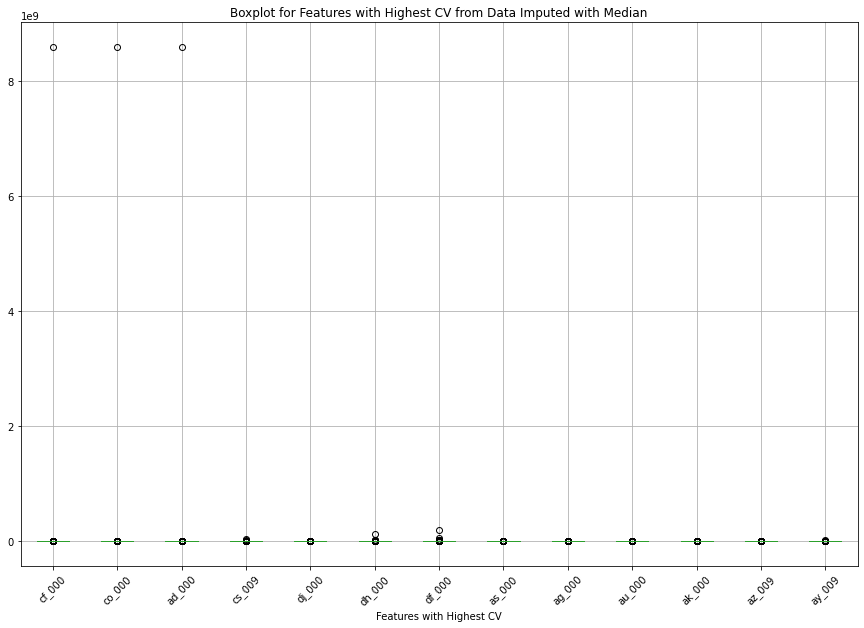

In [19]:
# Make boxplot for these features.
med_highest_CV.boxplot(rot=45, figsize=(15, 10))
plt.xlabel("Features with Highest CV")
plt.title("Boxplot for Features with Highest CV from Data Imputed with Median")
plt.show()

In [20]:
# Conclusion from scatterplots.
print("Conclusion from the scatterplots for both datasets (data imputed with mean vs median): There are a lot of values that are 0 in these features as shown on the pairplot above. In addition, we have 76,000 datapoints, but the scatterplots do not reflect the number of datapoints, indicating that a lot of the points may have the same values.")

Conclusion from the scatterplots for both datasets (data imputed with mean vs median): There are a lot of values that are 0 in these features as shown on the pairplot above. In addition, we have 76,000 datapoints, but the scatterplots do not reflect the number of datapoints, indicating that a lot of the points may have the same values.


<b>1bv) Determine the number of positive and negative data. Is this data set imbalanced?</b>

In [21]:
# Place the class and type columns back into the dataframe.
df_fin_mean = pd.concat([df['class'], df_mean, df['type']], axis=1)
print(df_fin_mean.shape)
df_fin_mean.groupby('class').count()

(76000, 172)


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,type
class,,,,,,,,,,,,,,,,,,,,,
neg,74625,74625,74625,74625,74625,74625,74625,74625,74625,74625,...,74625,74625,74625,74625,74625,74625,74625,74625,74625,74625
pos,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,...,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375


In [22]:
# Place the class and type columns back into the dataframe.
df_fin_med = pd.concat([df['class'], df_med, df['type']], axis=1)
print(df_fin_med.shape)
df_fin_med.groupby('class').count()

(76000, 172)


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,type
class,,,,,,,,,,,,,,,,,,,,,
neg,74625,74625,74625,74625,74625,74625,74625,74625,74625,74625,...,74625,74625,74625,74625,74625,74625,74625,74625,74625,74625
pos,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,...,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375


In [23]:
print("Data set is definitely imbalanced, with 74625 negative instances and 1375 positive instances. Will proceed with data imputation with median from this point forward because this dataset has a lot of outliers and is very skewed.")

Data set is definitely imbalanced, with 74625 negative instances and 1375 positive instances. Will proceed with data imputation with median from this point forward because this dataset has a lot of outliers and is very skewed.


<b>1c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.</b>

In [24]:
def plot_ROC(X, y, data_name, model):
    """
    Function plots the ROC curve with AUC on the plot label.
    
    Parameters:
    X (DataFrame): X_train or X_test on selected features.
    y (DataFrame): y_train or y_test on selected features.
    pos_label (str): Positive lab
    data_name(str): Name of the plot that follows "ROC Curve for".
    model (estimator): Model that is used.
    
    """
    y_score = model.predict_proba(X)[:,1]
    # For this dataset, the positive label is "pos" and negative lable is "neg".
    fpr, tpr, threshold = roc_curve(y, y_score, pos_label="pos")
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve and the AUC.
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc}')
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {data_name}")
    plt.legend()
    plt.show()
    return roc_auc

In [25]:
# Separate the train and test data after missing data is imputated with median.
train_df = df_fin_med[df_fin_med['type'] == 'train']
train_df = train_df.drop('type', axis=1)

test_df = df_fin_med[df_fin_med['type'] == 'test']
test_df = test_df.drop('type', axis=1)

print(train_df.shape, test_df.shape)

# Separate the X and y of train/test dataset.
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 171) (16000, 171)
(60000, 170) (60000,) (16000, 170) (16000,)


In [26]:
# Train random forest.
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

Misclassification error on training data: 0.0
For the training data -- True negative: 59000, False positive: 0, False negative: 0, True positive: 1000


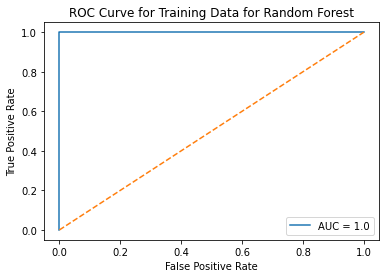

In [27]:
# Predict with trained random forest model (on training data).
y_pred_train = rf.predict(X_train)

# Calculate the misclassification error.
me_rf_train = 1 - accuracy_score(y_train, y_pred_train)
print(f"Misclassification error on training data: {me_rf_train}")

# Calculate the confusion matrix on train data.
tn_rf_train, fp_rf_train, fn_rf_train, tp_rf_train = confusion_matrix(y_train, y_pred_train).ravel()
print(f"For the training data -- True negative: {tn_rf_train}, False positive: {fp_rf_train}, False negative: {fn_rf_train}, True positive: {tp_rf_train}")

# Show the ROC and AUC for the classifier on train data.
rf_auc_train = plot_ROC(X_train, y_train, "Training Data for Random Forest", rf)

Misclassification error on test data: 0.007624999999999993
For the test data -- True negative: 15608, False positive: 17, False negative: 105, True positive: 270


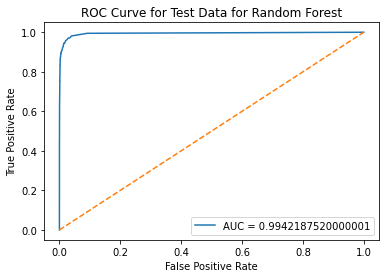

In [28]:
# Predict the test data.
yhat_rf = rf.predict(X_test)

# Find accuracy score
me_rf_test = 1 - accuracy_score(y_test, yhat_rf)
print(f"Misclassification error on test data: {me_rf_test}")

# Calculate the confusion matrix on train data.
tn_rf_test, fp_rf_test, fn_rf_test, tp_rf_test = confusion_matrix(y_test, yhat_rf).ravel()
print(f"For the test data -- True negative: {tn_rf_test}, False positive: {fp_rf_test}, False negative: {fn_rf_test}, True positive: {tp_rf_test}")

# Show the ROC and AUC for the classifier on train data.
rf_auc_test = plot_ROC(X_test, y_test, "Test Data for Random Forest", rf)

In [29]:
# Compare the out of bag error and the test misclassification error.
rf_oob = 1 - rf.oob_score_
print(f"The Out of Bag error estimate of the trained random forest: {rf_oob}")
print(f"The test misclassification error: {me_rf_test}")
print("The test misclassification error is greater than the Out of Bag error.")

The Out of Bag error estimate of the trained random forest: 0.005900000000000016
The test misclassification error: 0.007624999999999993
The test misclassification error is greater than the Out of Bag error.


<b>1d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.</b>

To deal with class imbalance, random forest uses class weighting. According to the sklearn documentation, the sklearn RandomForestClassifier has parameter class_weight that can be set to "balanced" to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [30]:
# Train random forest.
rf_bal = RandomForestClassifier(oob_score=True, class_weight='balanced')
rf_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True)

Misclassification error on training data while accounting for class imbalance: 0.0
For the training data while accounting for class imbalance -- True negative: 59000, False positive: 0, False negative: 0, True positive: 1000


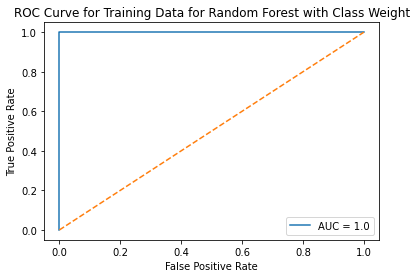

In [31]:
# Predict with trained random forest model (on training data).
y_pred_train_b = rf_bal.predict(X_train)

# Calculate the misclassification error.
me_rf_train_b = 1 - accuracy_score(y_train, y_pred_train_b)
print(f"Misclassification error on training data while accounting for class imbalance: {me_rf_train_b}")

# Calculate the confusion matrix on train data.
tn_rf_train_b, fp_rf_train_b, fn_rf_train_b, tp_rf_train_b = confusion_matrix(y_train, y_pred_train_b).ravel()
print(f"For the training data while accounting for class imbalance -- True negative: {tn_rf_train_b}, False positive: {fp_rf_train_b}, False negative: {fn_rf_train_b}, True positive: {tp_rf_train_b}")

# Show the ROC and AUC for the classifier on train data.
rfb_auc_train = plot_ROC(X_train, y_train, "Training Data for Random Forest with Class Weight", rf_bal)

Misclassification error on test data while accounting for class imbalance: 0.011125000000000052
For the test data while accounting for class imbalance -- True negative: 15610, False positive: 15, False negative: 163, True positive: 212


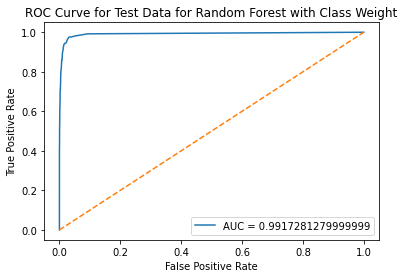

In [32]:
# Predict the test data.
yhat_rfb = rf_bal.predict(X_test)

# Find accuracy score
me_rf_test_b = 1 - accuracy_score(y_test, yhat_rfb)
print(f"Misclassification error on test data while accounting for class imbalance: {me_rf_test_b}")

# Calculate the confusion matrix on train data.
tn_rf_test_b, fp_rf_test_b, fn_rf_test_b, tp_rf_test_b = confusion_matrix(y_test, yhat_rfb).ravel()
print(f"For the test data while accounting for class imbalance -- True negative: {tn_rf_test_b}, False positive: {fp_rf_test_b}, False negative: {fn_rf_test_b}, True positive: {tp_rf_test_b}")

# Show the ROC and AUC for the classifier on train data.
rfb_auc_test = plot_ROC(X_test, y_test, "Test Data for Random Forest with Class Weight", rf_bal)

In [33]:
# Compare the out of bag error and the test misclassification error.
rfb_oob = 1 - rf_bal.oob_score_
print(f"The Out of Bag error estimate of the trained random forest: {rfb_oob}")
print(f"The test misclassification error: {me_rf_test_b}")
print("The test misclassification error is greater than the Out of Bag error.")

The Out of Bag error estimate of the trained random forest: 0.007833333333333359
The test misclassification error: 0.011125000000000052
The test misclassification error is greater than the Out of Bag error.


In [34]:
# Compare the test misclassification error and the auc of random forest without and with class weight for data imbalance.
print(f"The test misclassification error without class weight: {me_rf_test} vs. Test misclassification with class weight: {me_rf_test_b}.")
print(f"The AUC without class weight: {rf_auc_test} vs. AUC with class weight: {rfb_auc_test}.")
print(f"Random Forest without class weight to account for class imbalance performs better as the misclassification error are is lower than those of Random Forest with class weight to account for class imbalance. However, when comparing AUC for both models, the AUC values for both without and with class weight is very similar.")

The test misclassification error without class weight: 0.007624999999999993 vs. Test misclassification with class weight: 0.011125000000000052.
The AUC without class weight: 0.9942187520000001 vs. AUC with class weight: 0.9917281279999999.
Random Forest without class weight to account for class imbalance performs better as the misclassification error are is lower than those of Random Forest with class weight to account for class imbalance. However, when comparing AUC for both models, the AUC values for both without and with class weight is very similar.


<b>1e) XGBoost and Model Trees: In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.<br>
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.</b>

In [35]:
# Use XGBoost with L1-penalized logistic regression with 5 fold cross validation.
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

# Turn off the L2 regularization.
xgb = XGBClassifier(reg_lambda=0, objective="reg:logistic")
xgb_CV = GridSearchCV(xgb, param_grid={"reg_alpha": alphas}, cv=StratifiedKFold(5))
xgb_CV.fit(X_train, y_train)
print(f"Best regularization term: {xgb_CV.best_params_}")
cv_test_error = 1 - xgb_CV.score(X_test, y_test)
print(f"Cross validation test error: {cv_test_error}")

/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

Best regularization term: {'reg_alpha': 0.0001}
Cross validation test error: 0.006125000000000047


For the training data -- True negative: 59000, False positive: 0, False negative: 1, True positive: 999


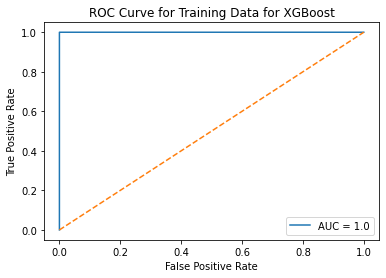

In [36]:
# Report the confusion matrix, ROC and AUC for training set.
# Predict with trained random forest model (on training data).
ypred_train_xgb = xgb_CV.predict(X_train)

# Calculate the confusion matrix on train data.
tn_xgb_train, fp_xgb_train, fn_xgb_train, tp_xgb_train = confusion_matrix(y_train, ypred_train_xgb).ravel()
print(f"For the training data -- True negative: {tn_xgb_train}, False positive: {fp_xgb_train}, False negative: {fn_xgb_train}, True positive: {tp_xgb_train}")

# Show the ROC and AUC for the classifier on train data.
xgb_auc_train = plot_ROC(X_train, y_train, "Training Data for XGBoost", xgb_CV)

Misclassification error on test data: 0.006125000000000047 whereas the cross validation error estimate is 0.006125000000000047.
For the test data -- True negative: 15609, False positive: 16, False negative: 82, True positive: 293


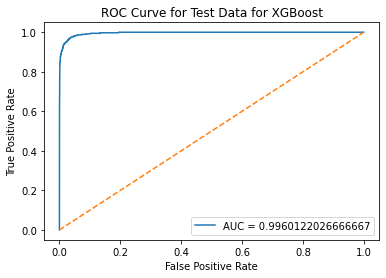

In [37]:
# Predict the test data.
yhat_xgb = xgb_CV.predict(X_test)

# Find accuracy score for comparison with cross validation estimated error.
xgb_err = 1 - accuracy_score(y_test, yhat_xgb)
print(f"Misclassification error on test data: {xgb_err} whereas the cross validation error estimate is {cv_test_error}.")

# Calculate the confusion matrix on train data.
tn_xgb_test, fp_xgb_test, fn_xgb_test, tp_xgb_test = confusion_matrix(y_test, yhat_xgb).ravel()
print(f"For the test data -- True negative: {tn_xgb_test}, False positive: {fp_xgb_test}, False negative: {fn_xgb_test}, True positive: {tp_xgb_test}")

# Show the ROC and AUC for the classifier on train data.
xgb_auc_test = plot_ROC(X_test, y_test, "Test Data for XGBoost", xgb_CV)

<b>1f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.</b>

In [38]:
# Build a pipeline for CV and SMOTE
smote = SMOTE(random_state=42)
xgb = XGBClassifier(reg_lambda=0, objective="reg:logistic")
pipe = Pipeline(steps=[('smote', smote), ('xgb', xgb)])
xgbsm_CV = GridSearchCV(pipe, param_grid={"xgb__reg_alpha": alphas}, cv=StratifiedKFold(5))
xgbsm_CV.fit(X_train, y_train)
print(f"Best regularization term: {xgbsm_CV.best_params_}")
cv_test_err_sm = 1 - xgbsm_CV.score(X_test, y_test)
print(f"Cross validation test error: {cv_test_err_sm}")

/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

Best regularization term: {'xgb__reg_alpha': 0.1}
Cross validation test error: 0.0078125


For the training data -- True negative: 59000, False positive: 0, False negative: 1, True positive: 999


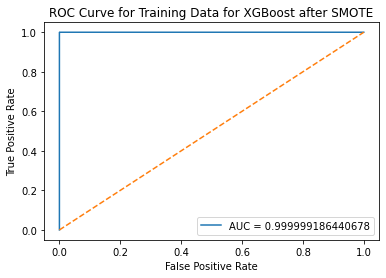

In [39]:
# Report the confusion matrix, ROC and AUC for training set.
# Predict with trained random forest model (on training data).
ypred_train_xgbsm = xgbsm_CV.predict(X_train)

# Calculate the confusion matrix on train data.
tn_xgbsm_train, fp_xgbsm_train, fn_xgbsm_train, tp_xgbsm_train = confusion_matrix(y_train, ypred_train_xgbsm).ravel()
print(f"For the training data -- True negative: {tn_xgbsm_train}, False positive: {fp_xgbsm_train}, False negative: {fn_xgbsm_train}, True positive: {tp_xgbsm_train}")

# Show the ROC and AUC for the classifier on train data.
xgbsm_auc_train = plot_ROC(X_train, y_train, "Training Data for XGBoost after SMOTE", xgbsm_CV)

Misclassification error on test data: 0.0078125 whereas the cross validation error estimate is 0.0078125.
For the test data -- True negative: 15570, False positive: 55, False negative: 70, True positive: 305


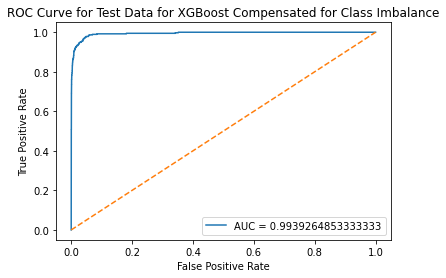

In [40]:
# Predict the test data, doesn't apply SMOTE to test set.
yhat_xgbsm = xgbsm_CV.predict(X_test)

# Find accuracy score for comparison with cross validation estimated error.
xgbsm_err = 1 - accuracy_score(y_test, yhat_xgbsm)
print(f"Misclassification error on test data: {xgbsm_err} whereas the cross validation error estimate is {cv_test_err_sm}.")

# Calculate the confusion matrix on train data.
tn_xgbsm_test, fp_xgbsm_test, fn_xgbsm_test, tp_xgbsm_test = confusion_matrix(y_test, yhat_xgbsm).ravel()
print(f"For the test data -- True negative: {tn_xgbsm_test}, False positive: {fp_xgbsm_test}, False negative: {fn_xgbsm_test}, True positive: {tp_xgbsm_test}")

# Show the ROC and AUC for the classifier on train data.
xgbsm_auc_test = plot_ROC(X_test, y_test, "Test Data for XGBoost Compensated for Class Imbalance", xgbsm_CV)

In [41]:
# Compare accuracy score and AUC for XGBoost without and with compensation for class imbalance.
print(f"Test error for XGBoost is {xgb_err} whereas after compensating for class imbalance is {xgbsm_err}.")
print(f"The AUC for XGBoost is {xgb_auc_test} whereas after compensating for class imbalance is {xgbsm_auc_test}.")

Test error for XGBoost is 0.006125000000000047 whereas after compensating for class imbalance is 0.0078125.
The AUC for XGBoost is 0.9960122026666667 whereas after compensating for class imbalance is 0.9939264853333333.


<b>2. ISLR 6.6.3<br>
i. Increase initially, and then eventually start decreasing in an inverted U shape.<br>
ii. Decrease initially, and then eventually srtart increasing in a U shape.<br>
iii. Steadily increase.<br>
iv. Steadily decrease.<br>
v. Remain constant.<br></b>

<b>2a) As we increase s from 0, the training RSS will</b><br>
Ans: This question is describing L1-penalty with Lasso. If s becomes larger, it means less restriction on the β coefficients. With larger β coefficients, the model will become more flexible. For training data, a more flexible model will fit training better, hence reducing RSS. In this case, training RSS will <u>iv. steadily decrease</u>.

<b>2b) What about test RSS?</b><br>
Ans: As reasoned in a), the model will become more flexible and this means that the test RSS will experience <u>ii. decrease initially, and then eventually start increasing in a U shape</u>. The increase will be due to overfitting as the model becomes more flexible, the risk of overfitting become greater.

<b>2c) What about variance?</b><br>
Ans: As reasoned in a), the model will become more flexible and this means that the variance will <u>iii. steadily increase</u>. 

<b>2d) What about (squared) bias?</b><br>
Ans: In the variance-bias tradeoff, as variance increase, bias will decrease. In this case, as model becomes more flexible, bias will <u>iv. steadily decrease</u>.

<b>2e) What about irreducible error?</b><br>
Ans: Irreducible error will not be affected and will <u>v. remain constant</u>. According the definition provided in ISLR, irreducible error is indepdendent of how well the model can estimate the data. This also means that it will not be affected by any changes to out model as it exist as noise in the data.

<b>3. ISLR 6.6.5</b><br>
Ans: Please see PDF for answer.

<b>4. ISLR 8.4.5</b><br>
Ans: Please see PDF for answer.

<b>5. ISLR 9.7.3<br>
5a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.</b><br>

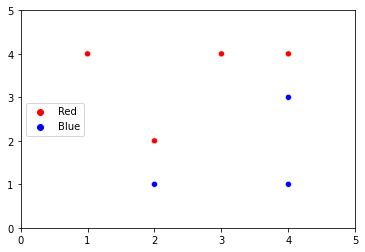

In [42]:
# Observations
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Plot the observations.
sns.scatterplot(x=x1, y=x2, hue=y, palette=['r', 'b'])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend(loc='center left')
plt.show()

<b>5b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form β0 + β1X1 + β2X2 = 0 (9.1))</b><br>

Ans: The optimal hyperplane leaves equal distance between two closest points, meaning that the hyperplane has to pass through (2, 1.5) and (4, 3.5). Equation should be -0.5 + X1 - X2 = 0.

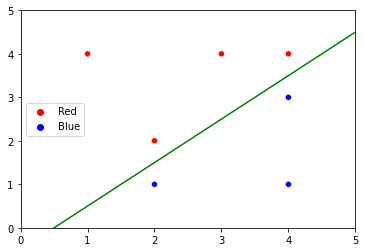

In [43]:
sns.scatterplot(x=x1, y=x2, hue=y, palette=['r', 'b'])
# Add in the hyperplane
plt.plot([0, 5], [-0.5, 4.5], color='g')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend(loc='center left')
plt.show()

<b>5c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.</b>

Ans: Classify to Red if -0.5 + X1 - X2 > 0, and classify to Blue otherwise. β0 = -0.5, β1 = 1, β2 = -1.

<b>5d) On your sketch, indicate the margin for the maximal margin hyperplane.</b>

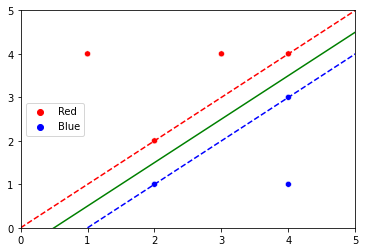

In [44]:
sns.scatterplot(x=x1, y=x2, hue=y, palette=['r', 'b'])
plt.plot([0, 5], [-0.5, 4.5], color='g')
# Add in margins
plt.plot([0, 5], [0, 5], linestyle='--', color='r')
plt.plot([1, 5], [0, 4], linestyle='--', color='b')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend(loc='center left')
plt.show()

<b>5e) Indicate the support vectors for the maximal margin classifier.</b>

Ans: By definition, the support vectors are the observations that lie along the dashed lines indiciating the width of the margin. There are four support vectors (2, 1), (2, 2), (4, 3), and (4, 4).

<b>5f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.</b>

Ans: The seventh observation is (4, 1), which is far from the maximal margin hyperplane and not a support vector for the maximal margin classifier.

<b>5g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.</b>

Ans: A non-optimal separating hyperplane is any line within the margin and the equation for the hyperplane I plotted is -0.3 + X1 - X2 = 0.

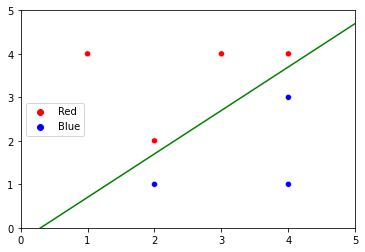

In [45]:
sns.scatterplot(x=x1, y=x2, hue=y, palette=['r', 'b'])
# Add in the hyperplane that is not optimal separating
plt.plot([0, 5], [-0.3, 4.7], color='g')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend(loc='center left')
plt.show()

<b>5h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.</b>

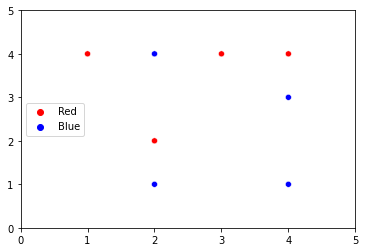

In [46]:
# Add additional observation such that two classes cannot be separable by a hyperplane.
x1.append(2)
x2.append(4)
y.append('Blue')

# Plot the observations.
sns.scatterplot(x=x1, y=x2, hue=y, palette=['r', 'b'])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend(loc='center left')
plt.show()

<b>References:</b><br>
1. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer<br>
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
3. https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html<br>
4. https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html<br>
5. https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/<br>
6. https://xgboost.readthedocs.io/en/stable/parameter.html<br>
7. https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7<br>